This is the assignment accompanying the stochastic models of neuroscience topic **Perceptual Decision Making**.

**Authors:**

Sudeshna Bora

Leonard Von Hollander

In [6]:
import brian2 as b2
from neurodynex.tools import plot_tools
from neurodynex.competing_populations import decision_making
import matplotlib.pyplot as plt
import numpy as np

# Question: Accessing a dictionary to plot the population rates

## Question: Understanding Brian2 Monitors

**For each of the four subpopulations, find the variable name of the corresponding NeuronGroup.**

The four subpopulations are inhib pop which is the inhibitory population, excit pop A, excit pop B and excit pop Z which
are the excitatory population.

**Each NeuronGroup is monitored with a PopulationRateMonitor, a SpikeMonitor, and a StateMonitor. Find the variable names for those monitors. Have a look at the Brian2 documentation if you are not familiar with the concept of monitors.**

For the inhibitory population, the PopulationRateMonitor, SpikeMonitor and StateMonitor is rate monitor inhib,spike monitor inhib, voltage monitor inhib.
For the excitatory populations, the PopulationRateMonitor, Spike- Monitor and StateMonitor are rate monitor A, spike monitor A,
voltage monitor A , rate monitor B, spike monitor B, voltage monitor B and rate monitor Z, spike monitor Z, voltage monitor Z.

**Which state variable of the neurons is recorded by the StateMonitor?**

The voltage "v" is being recorded.

## Question: Accessing a dictionary to plot the population rates

**Extend the following code block to include plots for all four subpopulations.**

In [2]:
results = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=-0.6, max_sim_time=1000. * b2.ms)

simulating 480 neurons. Start: Wed Sep 16 13:25:41 2020
sim end: Wed Sep 16 13:29:38 2020


INFO       width adjusted from 2. ms to 2.1 ms [brian2.monitors.ratemonitor.adjusted_width]


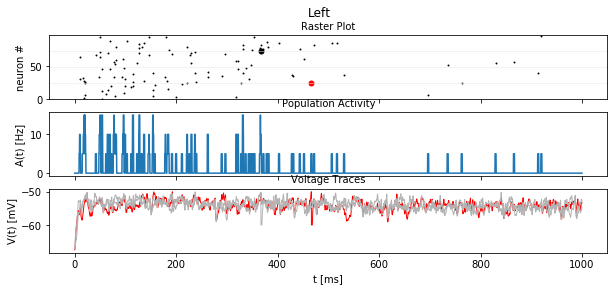

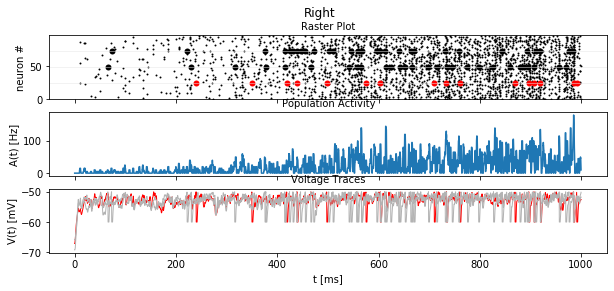

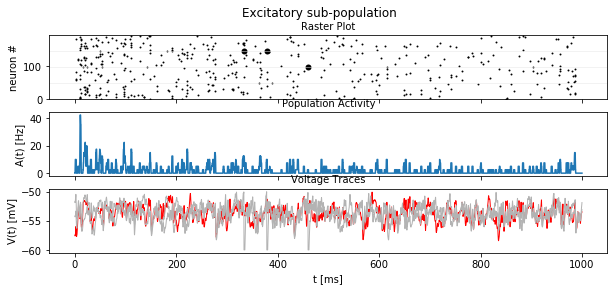

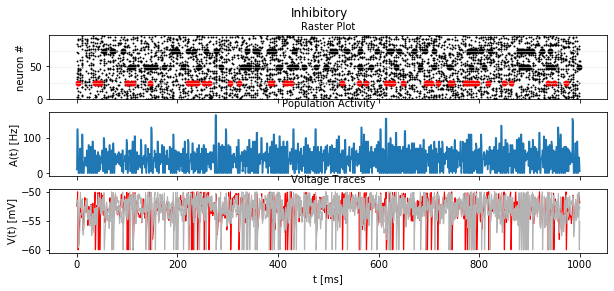

In [3]:
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Left")
plt.savefig('13_1_2_1000ms_A.png')
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Right")
plt.savefig('13_1_2_1000ms_B.png')
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Excitatory sub-population")
plt.savefig('13_1_2_1000ms_C.png')
plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Inhibitory")

plt.savefig('13_1_2_1000ms_inhib.png')
plt.show()

**Run the simulation for 800ms. What are the “typical” population rates of the four populations towards the end of the simulation? (In case the network did not decide, run the simulation again).**

In [47]:
results_800 = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=-0.6, max_sim_time=800. * b2.ms)

simulating 480 neurons. Start: Wed Sep 16 21:15:57 2020
sim end: Wed Sep 16 21:17:58 2020


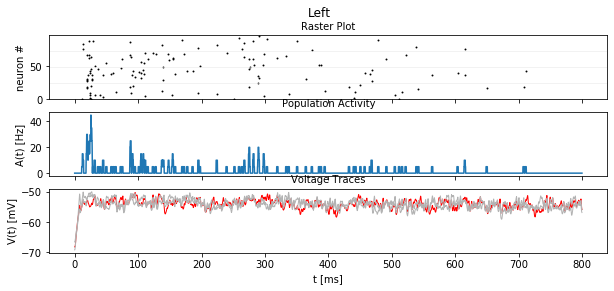

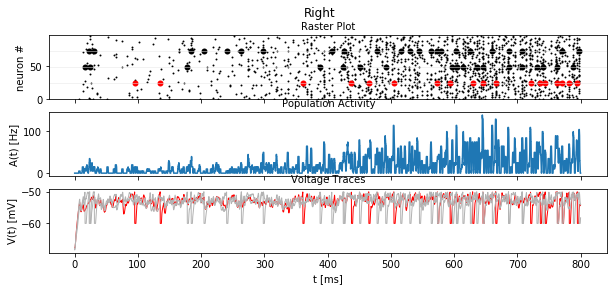

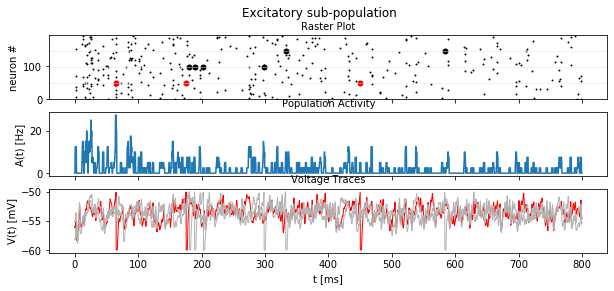

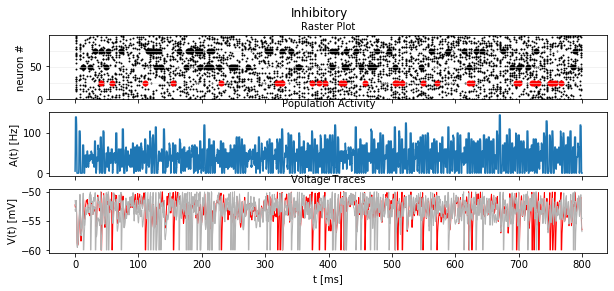

In [5]:
plot_tools.plot_network_activity(results_800["rate_monitor_A"], results_800["spike_monitor_A"],
                                 results_800["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Left")
plt.savefig('13_1_2_800ms_A.png')
plot_tools.plot_network_activity(results_800["rate_monitor_B"], results_800["spike_monitor_B"],
                                 results_800["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Right")
plt.savefig('13_1_2_800ms_B.png')
plot_tools.plot_network_activity(results_800["rate_monitor_Z"], results_800["spike_monitor_Z"],
                                 results_800["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Excitatory sub-population")
plt.savefig('13_1_2_800ms_Z.png')
plot_tools.plot_network_activity(results_800["rate_monitor_inhib"], results_800["spike_monitor_inhib"],
                                 results_800["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Inhibitory")

plt.savefig('13_1_2_800ms_inhib.png')
plt.show()

As can be seen for a negative coherence level , the right population is making a decision.

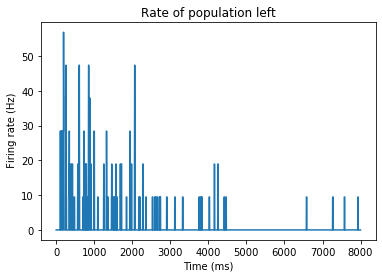

In [66]:
plt.plot(results_800["rate_monitor_A"].smooth_rate(window="flat", width= 1 * b2.ms)/b2.Hz)
plt.title("Rate of population left")
plt.xlabel("Time (ms)")
plt.ylabel(" Firing rate (Hz)")
plt.show()

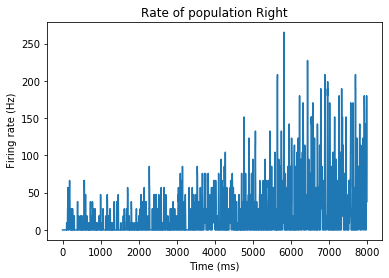

In [68]:
plt.plot(results_800["rate_monitor_B"].smooth_rate(window="flat", width=1 * b2.ms)/b2.Hz)
plt.title("Rate of population Right")
plt.xlabel("Time (ms)")
plt.ylabel(" Firing rate (Hz)")
plt.show()

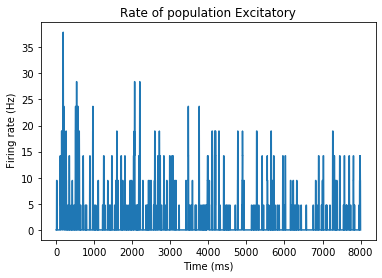

In [69]:
plt.plot(results_800["rate_monitor_Z"].smooth_rate(window="flat", width=1 * b2.ms)/b2.Hz)
plt.title("Rate of population Excitatory")
plt.xlabel("Time (ms)")
plt.ylabel(" Firing rate (Hz)")
plt.show()

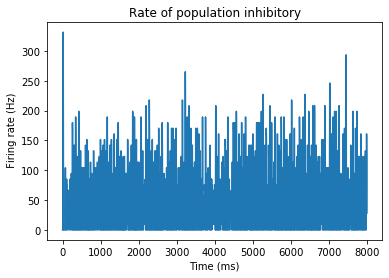

In [70]:
plt.plot(results_800["rate_monitor_inhib"].smooth_rate(window="flat", width=1 * b2.ms)/b2.Hz)
plt.title("Rate of population inhibitory")
plt.xlabel("Time (ms)")
plt.ylabel(" Firing rate (Hz)")
plt.show()

Towards the end we see almost negligible firing rate for the left population and the right population fires with a rate of 180 Hz. The inhibitory and the unbiased excitatory sub population do not show any such development towards the end of the simulation , they both fire at a rate of 180 Hz and 15 Hz respectively.

**Without running the simulation again, but by using the same results dictionary, plot the rates using different values for avg_window_width.**

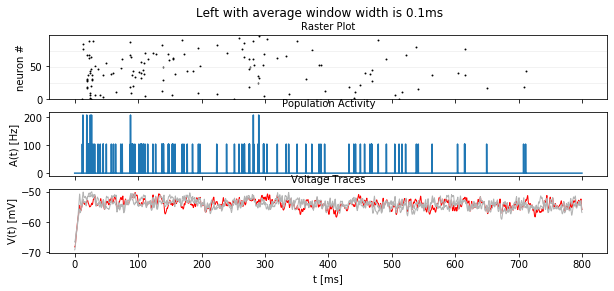

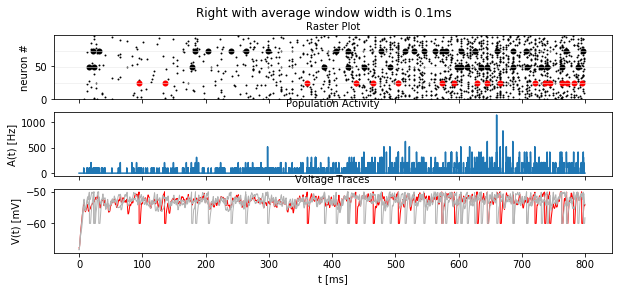

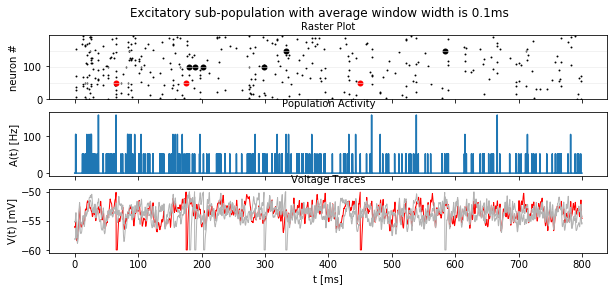

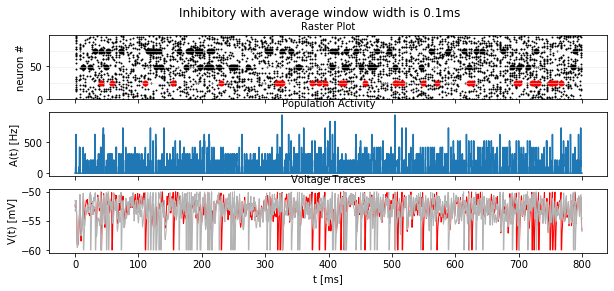

In [6]:
plot_tools.plot_network_activity(results_800["rate_monitor_A"], results_800["spike_monitor_A"],
                                 results_800["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=.1 * b2.ms,
                                 sup_title="Left with average window width is 0.1ms")
plt.savefig('rates_01_A.png')
plot_tools.plot_network_activity(results_800["rate_monitor_B"], results_800["spike_monitor_B"],
                                 results_800["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=.1 * b2.ms,
                                 sup_title="Right with average window width is 0.1ms")
plt.savefig('rates_01_B.png')
plot_tools.plot_network_activity(results_800["rate_monitor_Z"], results_800["spike_monitor_Z"],
                                 results_800["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=.1 * b2.ms,
                                 sup_title="Excitatory sub-population with average window width is 0.1ms")
plt.savefig('rates_01_Z.png')
plot_tools.plot_network_activity(results_800["rate_monitor_inhib"], results_800["spike_monitor_inhib"],
                                 results_800["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=.1 * b2.ms,
                                 sup_title="Inhibitory with average window width is 0.1ms")

plt.savefig('rates_01_inhib.png')
plt.show()

INFO       width adjusted from 1. ms to 1.1 ms [brian2.monitors.ratemonitor.adjusted_width]


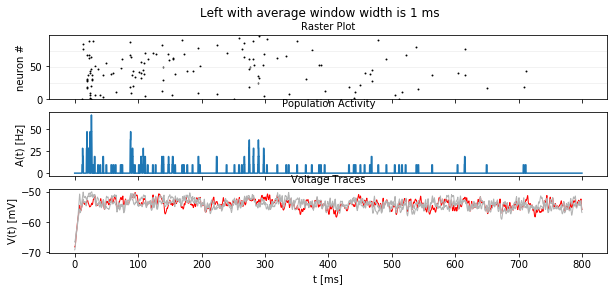

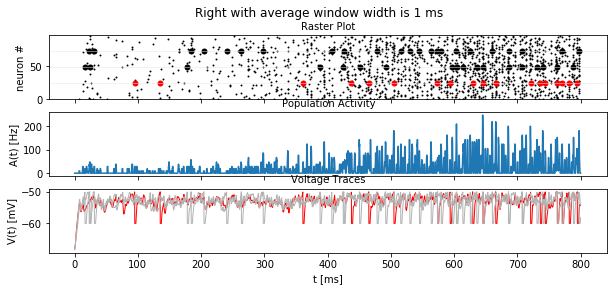

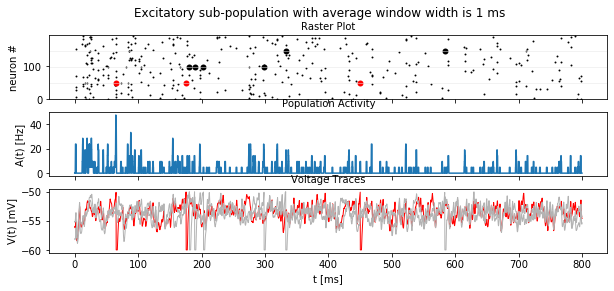

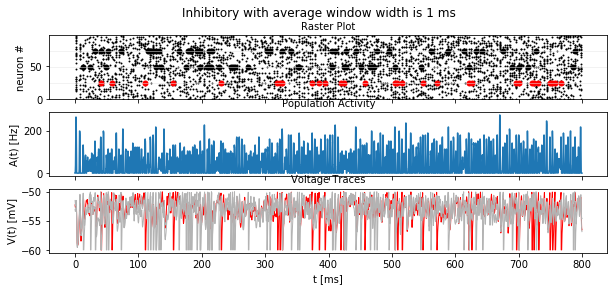

In [7]:
plot_tools.plot_network_activity(results_800["rate_monitor_A"], results_800["spike_monitor_A"],
                                 results_800["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=1. * b2.ms,
                                 sup_title="Left with average window width is 1 ms")
plt.savefig('rates_1_A.png')
plot_tools.plot_network_activity(results_800["rate_monitor_B"], results_800["spike_monitor_B"],
                                 results_800["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=1. * b2.ms,
                                 sup_title="Right with average window width is 1 ms")
plt.savefig('rates_1_B.png')
plot_tools.plot_network_activity(results_800["rate_monitor_Z"], results_800["spike_monitor_Z"],
                                 results_800["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=1. * b2.ms,
                                 sup_title="Excitatory sub-population with average window width is 1 ms")
plt.savefig('rates_1_Z.png')
plot_tools.plot_network_activity(results_800["rate_monitor_inhib"], results_800["spike_monitor_inhib"],
                                 results_800["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=1. * b2.ms,
                                 sup_title="Inhibitory with average window width is 1 ms")

plt.savefig('rates_1_inhib.png')
plt.show()

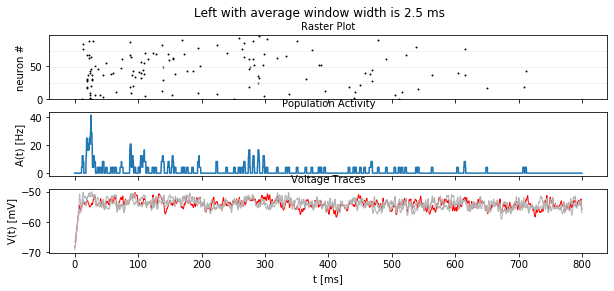

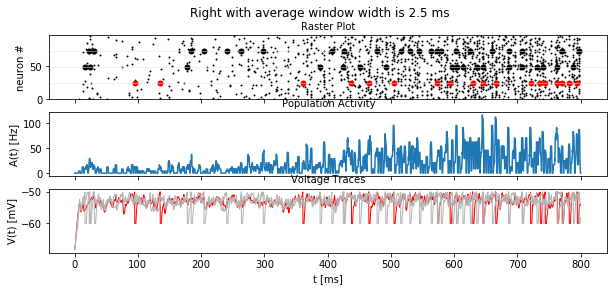

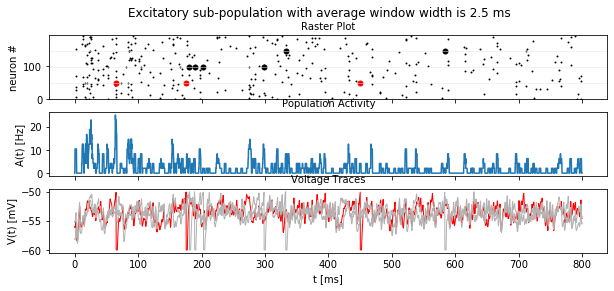

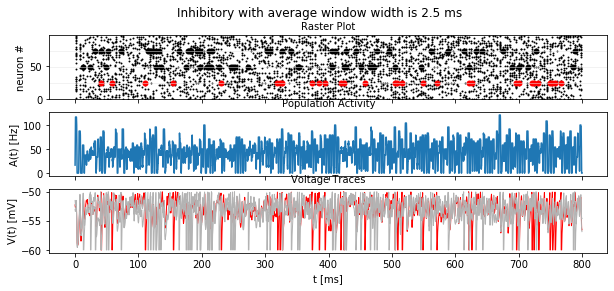

In [8]:
plot_tools.plot_network_activity(results_800["rate_monitor_A"], results_800["spike_monitor_A"],
                                 results_800["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Left with average window width is 2.5 ms")
plt.savefig('rates_25_A.png')
plot_tools.plot_network_activity(results_800["rate_monitor_B"], results_800["spike_monitor_B"],
                                 results_800["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Right with average window width is 2.5 ms")
plt.savefig('rates_25_B.png')
plot_tools.plot_network_activity(results_800["rate_monitor_Z"], results_800["spike_monitor_Z"],
                                 results_800["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Excitatory sub-population with average window width is 2.5 ms")
plt.savefig('rates_25_Z.png')
plot_tools.plot_network_activity(results_800["rate_monitor_inhib"], results_800["spike_monitor_inhib"],
                                 results_800["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Inhibitory with average window width is 2.5 ms")

plt.savefig('rates_25_inhib.png')
plt.show()


INFO       width adjusted from 5. ms to 5.1 ms [brian2.monitors.ratemonitor.adjusted_width]


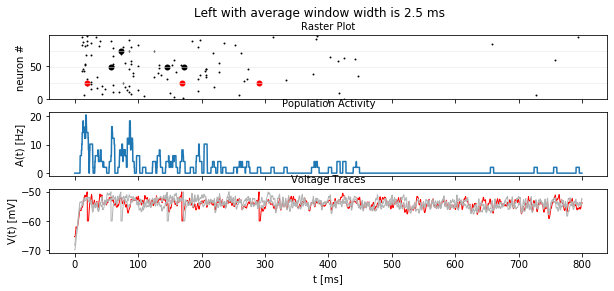

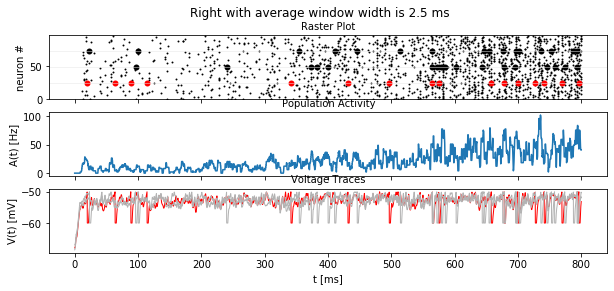

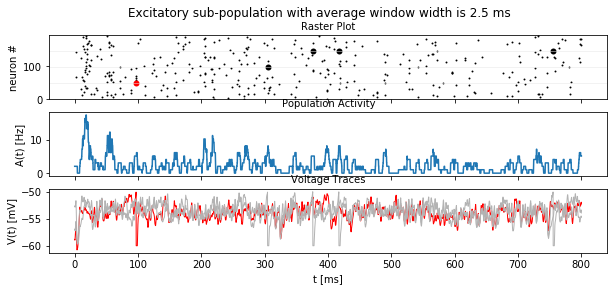

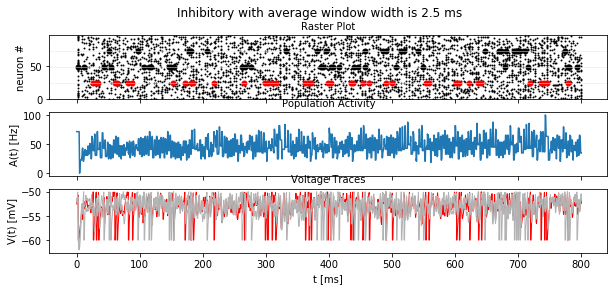

In [71]:
plot_tools.plot_network_activity(results_800["rate_monitor_A"], results_800["spike_monitor_A"],
                                 results_800["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=5 * b2.ms,
                                 sup_title="Left with average window width is 2.5 ms")
plt.savefig('rates_25_A.png')
plot_tools.plot_network_activity(results_800["rate_monitor_B"], results_800["spike_monitor_B"],
                                 results_800["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=5 * b2.ms,
                                 sup_title="Right with average window width is 2.5 ms")
plt.savefig('rates_25_B.png')
plot_tools.plot_network_activity(results_800["rate_monitor_Z"], results_800["spike_monitor_Z"],
                                 results_800["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=5 * b2.ms,
                                 sup_title="Excitatory sub-population with average window width is 2.5 ms")
plt.savefig('rates_25_Z.png')
plot_tools.plot_network_activity(results_800["rate_monitor_inhib"], results_800["spike_monitor_inhib"],
                                 results_800["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=5 * b2.ms,
                                 sup_title="Inhibitory with average window width is 2.5 ms")

plt.savefig('rates_25_inhib.png')
plt.show()

**Interpret the effect of a very short and a very long averaging window.** 

With decreasing in the averaging window the firing rate curve becomes smoother. Whereas increasing the averaging window decreases the firing rate.


**Find a value avg_window_width for which the population activity plot gives meaningful rates.**

Experimentally, the firing rate of the winning population should be in the range of 100 - 200 Hz and the losing population should be maximum 50 Hz. Hence, we are selecting 2.5 as the average window.

# Exercise: Stimulating the decision making circuit

##  Exercise: Stimulating the decision making circuit

$v_{left} = N(\mu_{left}, \sigma^{2})$

$v_{right} = N(\mu_{right}, \sigma^{2})$

$\mu_{left} = \mu_{0} * (0.5 + 0.5c)$

$\mu_{right} = \mu_{0} * (0.5 - 0.5c)$

c = [-1, 1]

###### **From the equation above, express the difference $\mu_{left}−\mu_{right}$ in terms of μ0 and c.**

The difference is $\mu_{0}$*c.

**Find the distribution of the difference $ν_{left}−ν_{right}$.**

$v_{left} = N(\mu_{left}, \sigma^{2})$

$v_{right} = N(\mu_{right}, \sigma^{2})$

$v_{left} - v_{right} = v_{left} + (-1) v_{right}$

= $N(\mu_{left} - \mu_{right}, 0)$

**What are the mean firing rates (in Hz) $\mu_{left}$ and $\mu_{right}$ for the coherence level c= -0.2?**

The default values of $\mu_{0}$ is 160 Hz and $\sigma^{2}$ = is 20 Hz.

The values of $\mu_{left}$ = 64 Hz and $\mu_{right}$ = 96 Hz.

**For c= -0.2, how does the difference $\mu_{left}$ −$\mu_{right}$ compare to the variance of $ν_{left}$−$ν_{right}$.**

 $\mu_{left}$ −$\mu_{right}$ is 32 Hz. We know that $v_{left}$ and $v_{right}$ is pulled from a normal distribution $N(\mu_{left}, \sigma^{2})$ ans $N(\mu_{right}, \sigma^{2})$. The largest difference between $ν_{left}$−$ν_{right}$ can be 72 and the smallest difference can be -8. 

## Question: Input stimuli with different coherence levels

**Does the network always make the correct decision?**

The first simulation is for c= -0.1

In [2]:
results001 = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,
                                                      coherence_level=-0.1, max_sim_time=1000. * b2.ms)

simulating 480 neurons. Start: Wed Sep 16 18:27:38 2020
sim end: Wed Sep 16 18:29:41 2020


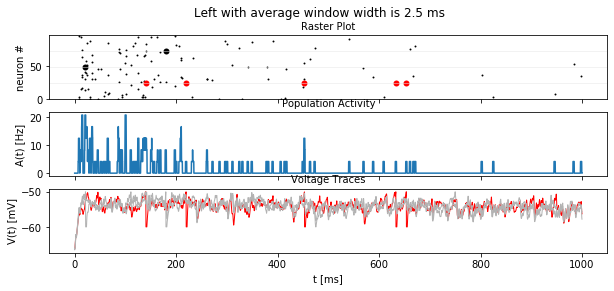

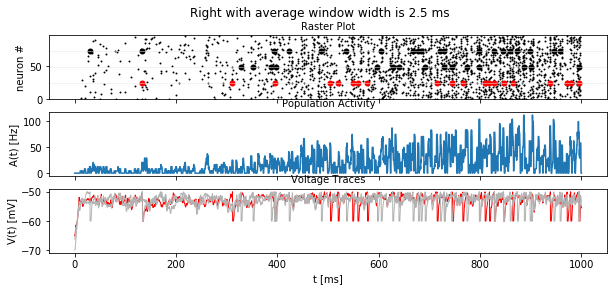

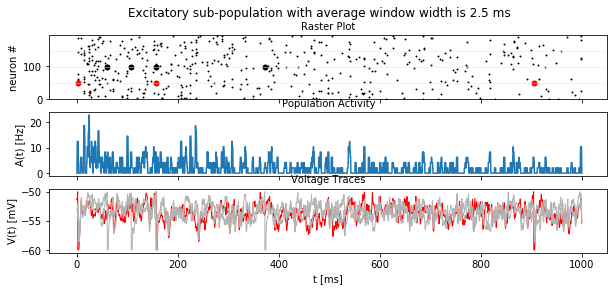

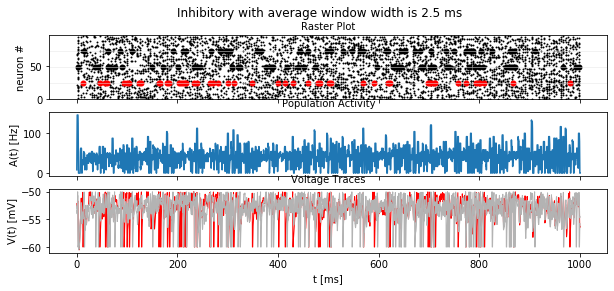

In [3]:
plot_tools.plot_network_activity(results001["rate_monitor_A"], results001["spike_monitor_A"],
                                 results001["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Left with average window width is 2.5 ms")
plt.savefig('rates_3_2_A.png')
plot_tools.plot_network_activity(results001["rate_monitor_B"], results001["spike_monitor_B"],
                                 results001["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Right with average window width is 2.5 ms")
plt.savefig('rates_3_2_B.png')
plot_tools.plot_network_activity(results001["rate_monitor_Z"], results001["spike_monitor_Z"],
                                 results001["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Excitatory sub-population with average window width is 2.5 ms")
plt.savefig('rates_3_2_Z.png')
plot_tools.plot_network_activity(results001["rate_monitor_inhib"], results001["spike_monitor_inhib"],
                                 results001["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Inhibitory with average window width is 2.5 ms")

plt.savefig('rates_3_2_inhib.png')
plt.show()

Simulating with c = 0.6

In [4]:
results = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,coherence_level=0.6, max_sim_time=1000. * b2.ms)


simulating 480 neurons. Start: Wed Sep 16 18:37:42 2020
sim end: Wed Sep 16 18:39:37 2020


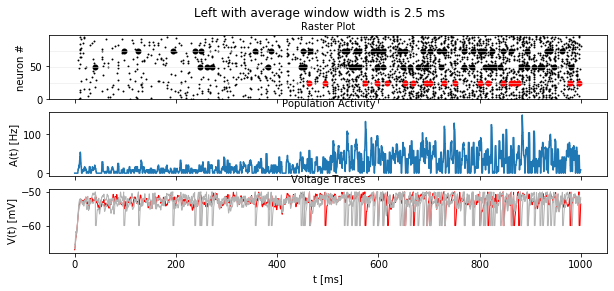

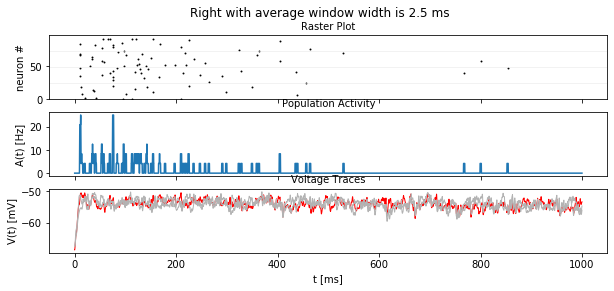

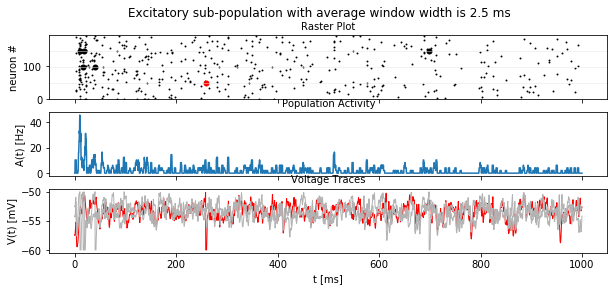

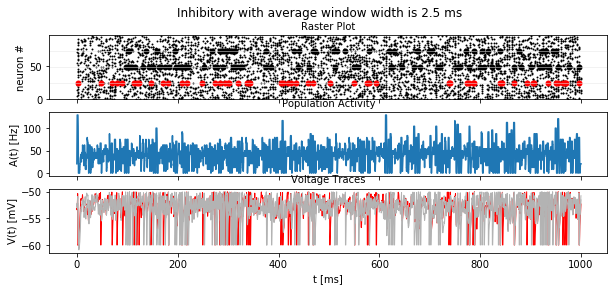

In [5]:
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Left with average window width is 2.5 ms")
plt.savefig('rates_4_2_A.png')
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Right with average window width is 2.5 ms")
plt.savefig('rates_4_2_B.png')
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Excitatory sub-population with average window width is 2.5 ms")
plt.savefig('rates_4_2_Z.png')
plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, avg_window_width=2.5 * b2.ms,
                                 sup_title="Inhibitory with average window width is 2.5 ms")

plt.savefig('rates_4_2_inhib.png')
plt.show()

**Does the network always make the correct decision?**

For c=-0.1 , we expect the right population to make the decision and for c = 0.6 , we expect the left to make a decision. This is clearly captured in the raster plot.

**Look at the population rates and estimate how long it takes the network to make a decision.**

For both the cases, the decision is taken at around 600 ms.

# Exercise: Decision Space

## Question: Plotting the Decision Space

**Write a function that takes two RateMonitors and plots the Decision Space.**

In [15]:
def Decision_Space(results_A,results_B,avg_window_width):
    A = results_A.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    B = results_B.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    graph=plt.scatter(A,B,c= np.arange(0,1,0.0001))
    plt.colorbar(graph,label="ms")
    plt.xlabel("population Left [firing rate HZ]")
    plt.ylabel("population Right [firing rate HZ]")
    plt.title("Decision Space for window width: {}".format(avg_window_width))
    plt.show()

**Add a parameter avg_window_width to your function (same semantics as in the exercise above). Run a few simulations and plot the phase plane for different values of avg_window_width.**

In [11]:
sim1 = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,coherence_level=-0.6, max_sim_time=1000. * b2.ms)

simulating 480 neurons. Start: Wed Sep 16 19:07:53 2020
sim end: Wed Sep 16 19:18:56 2020


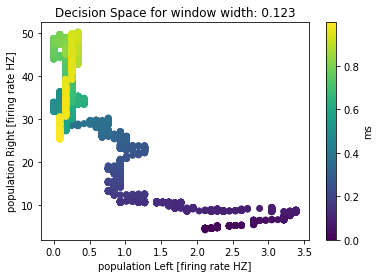

In [16]:
avg_window_width = 123*b2.ms

Decision_Space(sim1["rate_monitor_A"],sim1["rate_monitor_B"],avg_window_width)


INFO       width adjusted from 100. ms to 100.1 ms [brian2.monitors.ratemonitor.adjusted_width]


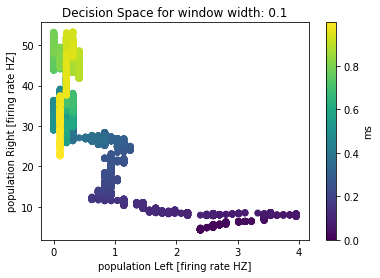

In [18]:
avg_window_width = 100*b2.ms

Decision_Space(sim1["rate_monitor_A"],sim1["rate_monitor_B"],avg_window_width)

INFO       width adjusted from 50. ms to 50.1 ms [brian2.monitors.ratemonitor.adjusted_width]


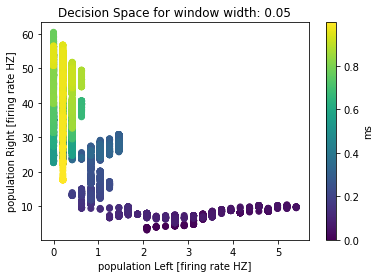

In [19]:
avg_window_width = 50*b2.ms

Decision_Space(sim1["rate_monitor_A"],sim1["rate_monitor_B"],avg_window_width)

**We can use a rate threshold as a decision criterion: We say the network has made a decision if one of the (smoothed) rates crosses a threshold. What are appropriate values for avg_window_width and rate threshold to detect a decision from the two rates?**

The appropiate rate threshold can be taken as 10 Hz and the appropiate average window width for a smooth firing rate can be taken to be 0.1 ms

## Question: Implementing a decision criterion

**Using your insights from the previous questions, implement a function get_decision_time that takes two RateMonitors , a avg_window_width and a rate_threshold. The function should return a tuple (decision_time_left, decision_time_right).**

In [20]:
def get_decision_time(results_A,results_B, avg_window_width, rate_threshold):
    smoothed_rates_A = results_A.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    smoothed_rates_B = results_B.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
    idx_A = np.argmax(smoothed_rates_A > rate_threshold/b2.Hz)
    A = idx_A * b2.defaultclock.dt
    idx_B = np.argmax(smoothed_rates_B > rate_threshold/b2.Hz)
    B = idx_B * b2.defaultclock.dt
    return (A,B)

In [21]:
results = decision_making.sim_decision_making_network(t_stimulus_start= 50. * b2.ms,coherence_level=-0.6, max_sim_time=1000. * b2.ms)

simulating 480 neurons. Start: Wed Sep 16 19:33:38 2020
sim end: Wed Sep 16 19:35:49 2020


In [22]:
get_decision_time(results["rate_monitor_A"], results["rate_monitor_B"], avg_window_width=30*b2.ms, rate_threshold=10.6*b2.Hz)

INFO       width adjusted from 30. ms to 30.1 ms [brian2.monitors.ratemonitor.adjusted_width]


(0. * second, 0.5761 * second)

With coherence level as -0.6, the right population is making a decision

In [23]:
get_decision_time(results["rate_monitor_A"], results["rate_monitor_B"], avg_window_width=123*b2.ms, rate_threshold=1.6*b2.Hz)

(0. * second, 0. * second)

In [24]:
get_decision_time(results["rate_monitor_A"], results["rate_monitor_B"], avg_window_width=300*b2.ms, rate_threshold=1.6*b2.Hz)

INFO       width adjusted from 300. ms to 299.9 ms [brian2.monitors.ratemonitor.adjusted_width]


(0. * second, 0. * second)

The above two calls give example of no decision being taken.

# Exercise: Percent-correct and Decision-time as a function of coherence level

## Question: Running multiple simulations

**Write a function that takes coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No and writes Percent correct (for each level in coherence_levels) to the terminal.**

In [26]:
def percent_correct(coherence_levels,time_to_A, time_to_B, count_A, count_B, count_No):
    percent_correct_index=[]
    for index in range(len(coherence_levels)):
        coherence_level=coherence_levels[index]
        if coherence_level > 0:
            win=count_A[index]
        else:
            win=count_B[index]
        no_of_rounds=len(time_to_A[[index]][0])
        percent_correct= (win/no_of_rounds)*100
        percent_correct_index.append(percent_correct)
    return percent_correct_index

## Question: Percent-Correct, Time-to-decision

**Using run_multiple_simulations(), run at least 20 simulations for each of the two coherence_levels = [+0.15, -0.8] and visualize the results.**

In [27]:
coherence_levels = [+0.15, -0.8]
nr_repetitions = 20
avg_window_width=30*b2.ms
max_sim_time=1000. * b2.ms
rate_threshold=10*b2.Hz
time_to_A, time_to_B, count_A, count_B, count_No = decision_making.run_multiple_simulations(get_decision_time,coherence_levels, nr_repetitions, max_sim_time=max_sim_time, rate_threshold=rate_threshold, avg_window_width=avg_window_width)


********************************************
coherence_level=0.15
i_run=0
simulating 480 neurons. Start: Wed Sep 16 19:46:56 2020
sim end: Wed Sep 16 19:49:17 2020
t_A=0.0, t_B=0.5591
decision: B
i_run=1
simulating 480 neurons. Start: Wed Sep 16 19:49:17 2020
sim end: Wed Sep 16 19:58:07 2020
t_A=0.0, t_B=0.5528000000000001
decision: B
i_run=2
simulating 480 neurons. Start: Wed Sep 16 19:58:07 2020
sim end: Wed Sep 16 19:59:42 2020
t_A=0.4923, t_B=0.0
decision: A
i_run=3
simulating 480 neurons. Start: Wed Sep 16 19:59:42 2020
sim end: Wed Sep 16 20:00:50 2020
t_A=0.0212, t_B=0.0
decision: A
i_run=4
simulating 480 neurons. Start: Wed Sep 16 20:00:50 2020
sim end: Wed Sep 16 20:02:39 2020
t_A=0.7200000000000001, t_B=0.0
decision: A
i_run=5
simulating 480 neurons. Start: Wed Sep 16 20:02:39 2020
sim end: Wed Sep 16 20:04:33 2020
t_A=0.0, t_B=0.0
no decision
i_run=6
simulating 480 neurons. Start: Wed Sep 16 20:04:33 2020
sim end: Wed Sep 16 20:07:42 2020
t_A=0.6918000000000001, t_B=0.0
dec

In [44]:
def plot_simulation_stats(coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No):
    percentage_correct=percent_correct(coherence_levels,time_to_A, time_to_B, count_A, count_B, count_No)
    plt.plot(coherence_levels,percentage_correct)
    plt.title('Percentage Correct - Coherence graph')
    plt.xlabel('Coherence level')
    plt.ylabel('Percentage')
    plt.show()
    Time_To_Decision=[]
    for index in range(len(coherence_levels)):
        temp=[]
        for A in time_to_A[[index]][0]:
            if A > 0:
                temp.append(A)
        for B in time_to_B[[index]][0]:
            if B < 0:
                temp.append(B)
        Time_To_Decision.append(np.sum(temp))
    plt.title('Decision Time - Coherence graph')
    plt.xlabel('Coherence level')
    plt.ylabel('Decision Time')
    plt.plot(coherence_levels,Time_To_Decision)
    plt.show()

In [38]:
print("The percentage correct for c = 0.15 and c = -0.8 is {}".format(percent_correct(coherence_levels,time_to_A, time_to_B, count_A, count_B, count_No)))

The percentage correct for c = 0.15 and c = -0.8 is [65.0, 75.0]


**Visualize Percent correct versus coherence level.**

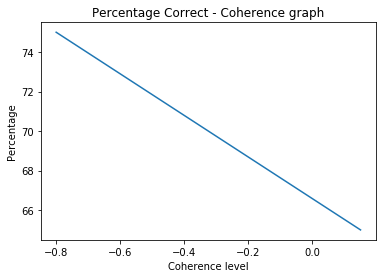

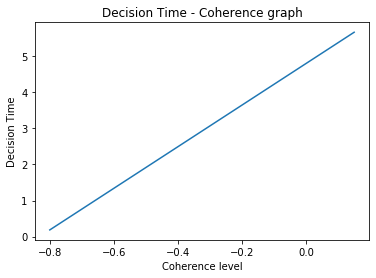

In [45]:
plot_simulation_stats(coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No)

From the graph we can see that as coherence level becomes more and more negative, the decision time decreases as well as the percentage correct increases. This is expected behaviour if we look at the literature.